In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/HeightWeight.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [4]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [5]:
df.head(5)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.columns = ['Index', 'Height', 'Weight']

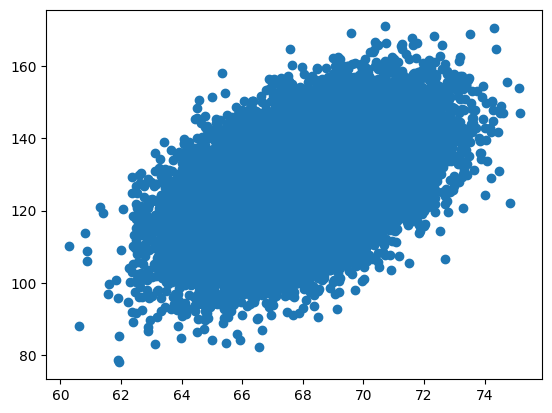

In [14]:
plt.scatter(df['Height'], df['Weight'])

In [19]:
df.drop('Index', axis=1, inplace=True)

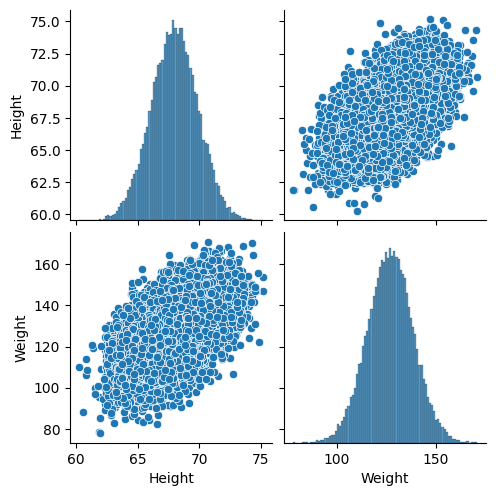

In [20]:
sns.pairplot(df)

In [21]:
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [22]:
X=df[['Weight']] #Independent Variable
y=df['Height'] #Dependent Variable

In [23]:
X

,Weight
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971
...,...
24995,118.0312
24996,120.1932
24997,118.2655
24998,132.2682


In [24]:
y

0        65.78331
1        71.51521
2        69.39874
3        68.21660
4        67.78781
           ...   
24995    69.50215
24996    64.54826
24997    64.69855
24998    67.52918
24999    68.87761
Name: Height, Length: 25000, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
print("X Train size: ",X_train.shape)
print("X Test size: ",X_test.shape)
print("y Train size: ",y_train.shape)
print("y Train size: ",y_test.shape)

X Train size:  (17500, 1)
X Test size:  (7500, 1)
y Train size:  (17500,)
y Train size:  (7500,)


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
ss = StandardScaler()

In [33]:
X_train_std = ss.fit_transform(X_train)

In [34]:
X_train_std.mean(), X_train_std.std()

(np.float64(-7.170391264870497e-16), np.float64(1.0))

In [40]:
X_test_std = ss.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression

In [39]:
lrm = LinearRegression()
lrm.fit(X_train_std, y_train)

LinearRegression()

In [46]:
lrm.coef_, lrm.intercept_

(array([0.94694738]), np.float64(67.99666177257143))

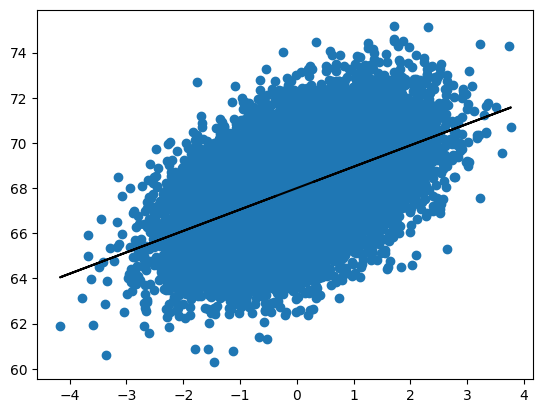

In [48]:
plt.scatter(X_train_std, y_train)
plt.plot(X_train_std, lrm.coef_*X_train_std + lrm.intercept_, color='black')

In [42]:
y_pred = lrm.predict(X_test_std)

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
mean_squared_error(y_test, y_pred)

2.7260408608752855

In [58]:
mean_absolute_error(y_test, y_pred)

1.3135652690988475

In [59]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(1.651072639490851)

In [60]:
r2_score(y_test, y_pred)

0.259528312037243

In [61]:
1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)

0.25942955614394303

In [62]:
#OLS Linear Regression
import statsmodels.api as sm

In [63]:
model = sm.OLS(y_train, X_train_std).fit()

In [64]:
y_pred_ols = model.predict(X_test_std)

In [65]:
mean_squared_error(y_test, y_pred_ols)

4624.192968710371

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.392
Date:                Fri, 24 Jan 2025   Prob (F-statistic):                      0.0655
Time:                        09:07:50   Log-Likelihood:                         -98677.
No. Observations:               17500   AIC:                                  1.974e+05
Df Residuals:                   17499   BIC:                                  1.974e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9469      0.514      1.842      0.066      -0.061       1.955
==============================================================================
Omnibus:                        1.115   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.108
Skew:                          -0.019   Prob(JB):                        0.575
Kurtosis:                       3.004   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [71]:
lrm.predict([[65.78331]])

array([130.28999483])